# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [33]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path

%matplotlib inline

In [34]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")


## Load Data

In [35]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.tail()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390
2016,Visitacion Valley,328.319007,384242,4390
2016,Westwood Park,631.195426,384242,4390


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [36]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
avg_house_units = sfo_data.groupby('year')['housing_units'].mean()
avg_house_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

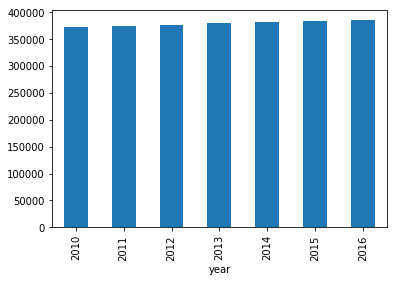

In [37]:
avg_house_units.plot.bar()

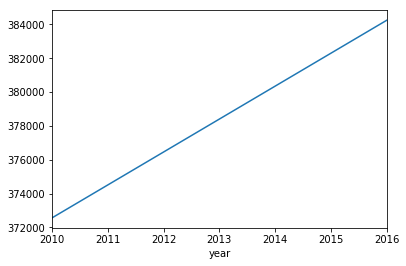

In [38]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
avg_house_units.plot()


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!


#plt.show()
#plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [39]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!

avg_gross_sales = sfo_data.groupby('year')['gross_rent','sale_price_sqr_foot'].mean()

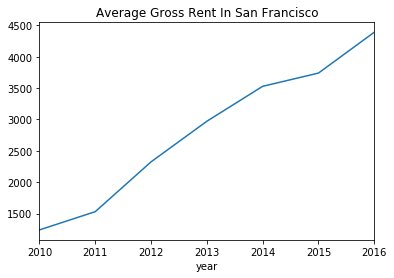

In [40]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!
avg_gross_sales['gross_rent'].plot(title='Average Gross Rent In San Francisco')

### Average Sales Price per Year

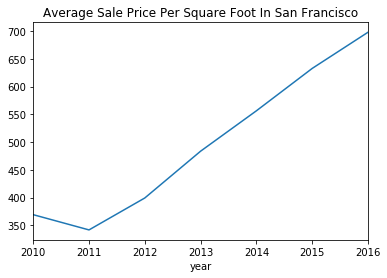

In [41]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
avg_gross_sales['sale_price_sqr_foot'].plot(title='Average Sale Price Per Square Foot In San Francisco')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [42]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
neighborhood = sfo_data.groupby(['year','neighborhood'])['sale_price_sqr_foot'].mean()
avg_sales_df = pd.DataFrame(neighborhood)
avg_sales_df.head

<bound method NDFrame.head of                              sale_price_sqr_foot
year neighborhood                               
2010 Alamo Square                     291.182945
     Anza Vista                       267.932583
     Bayview                          170.098665
     Buena Vista Park                 347.394919
     Central Richmond                 319.027623
...                                          ...
2016 Telegraph Hill                   903.049771
     Twin Peaks                       970.085470
     Van Ness/ Civic Center           552.602567
     Visitacion Valley                328.319007
     Westwood Park                    631.195426

[397 rows x 1 columns]>

In [43]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
avg_sales_df.hvplot(groupby="neighborhood",widget_location='right_top')


Row
    [0] HoloViews(DynamicMap)
    [1] Column
        [0] WidgetBox(css_classes=['widget-box'])
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [48]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
neighborhood_sales = sfo_data.groupby(['neighborhood'])['sale_price_sqr_foot'].mean()
hoodsales_topten = neighborhood_sales.sort_values(ascending=False)
hoodsales_topten.head(10)


neighborhood
Union Square District    903.993258
Merced Heights           788.844818
Miraloma Park            779.810842
Pacific Heights          689.555817
Westwood Park            687.087575
Telegraph Hill           676.506578
Presidio Heights         675.350212
Cow Hollow               665.964042
Potrero Hill             662.013613
South Beach              650.124479
Name: sale_price_sqr_foot, dtype: float64

In [49]:
#neighborhood_sales_df = pd.DataFrame(neighborhood_sales)
#neighborhood_sales_df = neighborhood_sales_df

In [50]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
hoodsales_topten.hvplot.bar(rot=90,frame_height=300,frame_width=800)


:Bars   [neighborhood]   (sale_price_sqr_foot)

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [53]:
neighborhood_sales_data = sfo_data.groupby(['neighborhood'])['sale_price_sqr_foot','housing_units', 'gross_rent'].mean()
topten = neighborhood_sales_data.sort_values(ascending=False, by='sale_price_sqr_foot')
topten_display = topten.head(10)

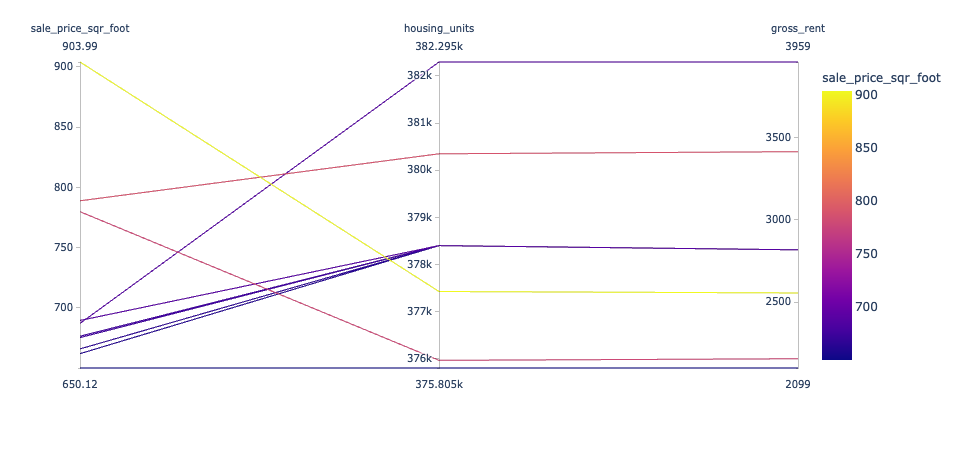

In [54]:
px.parallel_coordinates(topten_display, color='sale_price_sqr_foot')

In [60]:
topten_display

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [61]:
topten_index_fix = topten_display.reset_index()

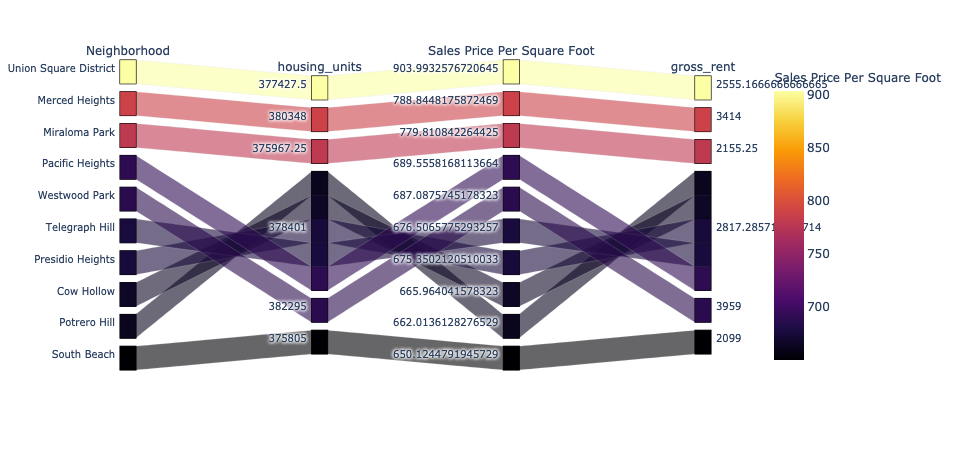

In [62]:
# Parallel Categories Plot  
# YOUR CODE HERE!
topten_index_fix = topten_display.reset_index()
px.parallel_categories(
    topten_index_fix,
    dimensions=["neighborhood","housing_units","sale_price_sqr_foot","gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
            "sale_price_sqr_foot":"Sales Price Per Square Foot",
            "neighborhood": "Neighborhood",
        
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [17]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [18]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
neighborhood_mean = sfo_data.groupby(['neighborhood'])['sale_price_sqr_foot','housing_units','gross_rent'].mean()
neighborhood_mean.head()


,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [19]:
neighborhood_mean = neighborhood_mean.reset_index()
neighborhood_mean.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [20]:
merged = pd.merge(
        df_neighborhood_locations,
        neighborhood_mean,
        left_index=True,
        right_index=True)
merged.head()

,Neighborhood,Lat,Lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,Bernal Heights,576.746488,379374.5,3080.333333


In [21]:
merged_df = merged[['Neighborhood','Lat','Lon','sale_price_sqr_foot','housing_units','gross_rent']]
merged_df.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


In [22]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE! I put it above

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

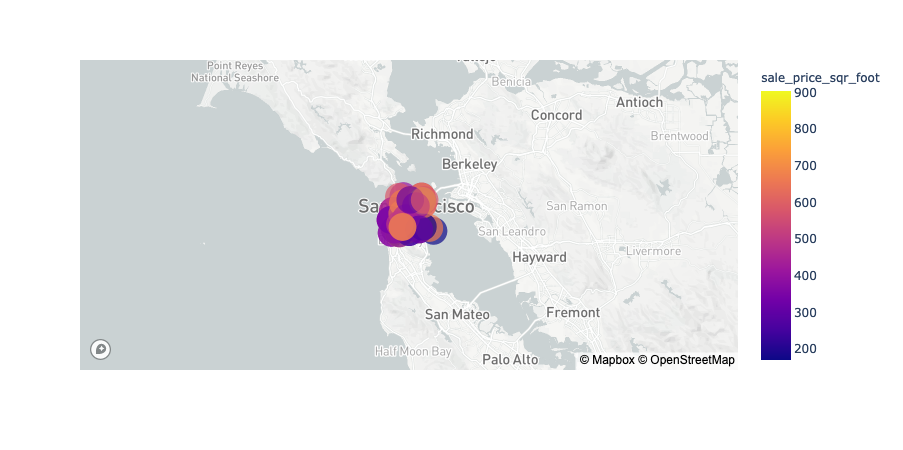

In [23]:
px.set_mapbox_access_token(mapbox_token)
fig = px.scatter_mapbox(merged_df, lat="Lat", lon="Lon", color="sale_price_sqr_foot", size ="housing_units")
fig.show()